In [ ]:
import tensorflow as tf

from google.colab import drive
import zipfile, os

In [ ]:
drive.mount('/content/drive')
print(os.getcwd())
os.chdir(os.getcwd() + '/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


FileNotFoundError: ignored

# 1. Data Preparation

In [ ]:
local_zip = 'datasets/messy-vs-clean-room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('datasets')
zip_ref.close()

In [ ]:
base_dir = 'datasets/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))


['clean', 'messy']
['clean', 'messy']


In [ ]:
train_clean_dir = os.path.join(train_dir, 'clean')
train_messy_dir = os.path.join(train_dir, 'messy')

validation_clean_dir = os.path.join(validation_dir, 'clean')
validation_messy_dir = os.path.join(validation_dir, 'messy')

print(train_clean_dir)
print(validation_messy_dir)

datasets/images/train/clean
datasets/images/val/messy


# 2. Data Pre-processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# membuat objek ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [1]:
# menggunakan objek ImageDataGenerator untuk mempersiapkan data train dan test

train_generator = train_datagen.flow_from_directory(
    base_dir, #direktori data latih
    target_size=(150, 150), #mengubah resolusi seluruh gambar menjadi 150x150 pixel
    batch_size=4,
    class_mode='binary' #masalah klasifikasi 2 kelas, maka menggunakan binary
)

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

NameError: ignored

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

# 3. Data Processing / Modelling

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=25, #berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, #tambahkan epochs jika akurasi model belum optimal
    validation_data=validation_generator, #menampilkan akurasi pengujian data validasi
    validation_steps=5, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7673 - accuracy: 0.5800 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 7s - loss: 0.6984 - accuracy: 0.5500 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6971 - accuracy: 0.4600 - val_loss: 0.6907 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 6s - loss: 0.6695 - accuracy: 0.6700 - val_loss: 0.6189 - val_accuracy: 0.6500
Epoch 5/20
25/25 - 6s - loss: 0.6418 - accuracy: 0.6700 - val_loss: 0.6308 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 6s - loss: 0.6007 - accuracy: 0.6700 - val_loss: 0.4624 - val_accuracy: 0.8000
Epoch 7/20
25/25 - 6s - loss: 0.6340 - accuracy: 0.6800 - val_loss: 0.5721 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 6s - loss: 0.5509 - accuracy: 0.7900 - val_loss: 0.4264 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 6s - loss: 0.6500 - accuracy: 0.6600 - val_loss: 0.6550 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 6s - loss: 0.6284 - accuracy: 0.6100 - val_loss: 0.5657 - val_accuracy: 0.7000
Epoch 11/20
25/25 -

# 4. Model Prediction Test

Saving IMG_20210719_214550.jpg to IMG_20210719_214550 (1).jpg
IMG_20210719_214550.jpg
messy


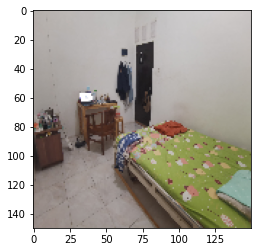

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')